# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.058203e+01     9.113671e+00
 * time: 0.0042362213134765625
     1     2.785160e+01     5.847774e+00
 * time: 0.013080120086669922
     2     2.609076e+01     9.995119e+00
 * time: 0.035433053970336914
     3     1.549080e+01     3.919389e+00
 * time: 0.059644222259521484
     4     1.263404e+01     1.677284e+00
 * time: 0.07876706123352051
     5     1.196675e+01     2.604847e+00
 * time: 0.09387421607971191
     6     1.078994e+01     1.649610e+00
 * time: 0.10975217819213867
     7     1.041260e+01     1.341628e+00
 * time: 0.12576818466186523
     8     9.961567e+00     1.366446e+00
 * time: 0.22934603691101074
     9     9.552508e+00     7.342814e-01
 * time: 0.24493813514709473
    10     9.265775e+00     9.333983e-01
 * time: 0.26028919219970703
    11     9.201110e+00     9.378953e-01
 * time: 0.2715730667114258
    12     9.190458e+00     1.187192e+00
 * time: 0.2826850414276123
    13     9.135557e+00     6.335493e-01
 * ti

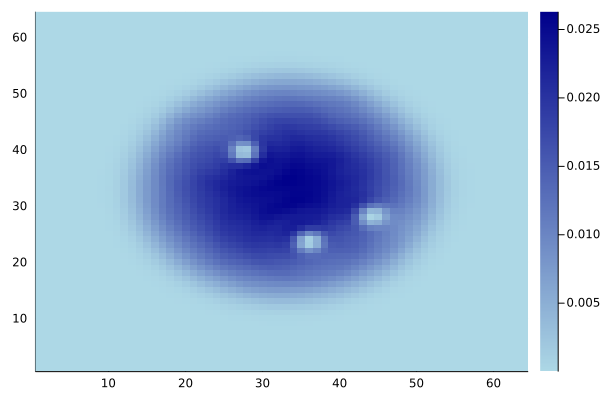

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         LocalNonlinearity(ρ -> C * ρ^α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # spinless electrons
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)